# Univariate linear regression

- Hypothesis: $h_\theta(x) = \theta_0 + \theta_1 x$
- Parameters: $\theta_0, \theta_1$
- Cost function: $J(\theta) = \displaystyle\frac 1{2m}\sum_{i=1}^m[h_\theta(x_i) - y_i]^2 $
- Goal: $\displaystyle\min_\theta J(\theta) $

## Example problem data

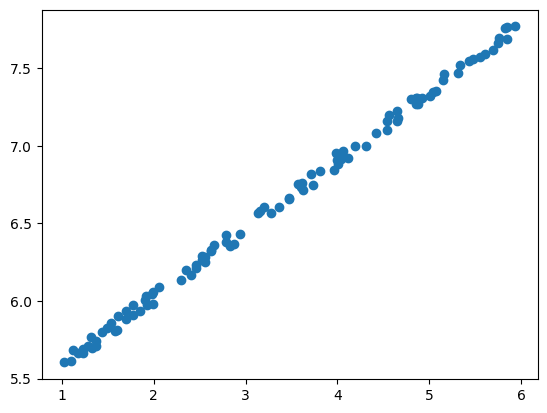

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a, b = 0.44, 5.1
samples = 100

np.random.seed(42)
x = 5 * np.random.rand(samples, 1) + 1
eta = 0.1 * np.random.rand(samples, 1)
y = a * x + b + eta

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

## Graphical intuition

In [2]:
mesh = np.mgrid[4.5:6.5:0.01, 0:1:0.01]
thetas = np.stack(mesh, axis=-1).reshape(-1, 2)
tx, ty = mesh
h = lambda theta, X: np.matmul(thetas, X.T)

X = np.hstack((np.ones((samples, 1)), x))
Ji = h(thetas, X).T - y
J = 0.5 / samples * np.sum(Ji * Ji, axis=0).reshape(-1, thetas.shape[0]).T

xyz = np.hstack((thetas, J))
np.savetxt("tmp.txt", xyz, delimiter=" ")
#plt.pcolormesh(tx, ty, J.reshape(mesh.shape[1], mesh.shape[2]))

In [3]:
%load_ext gnuplot_kernel

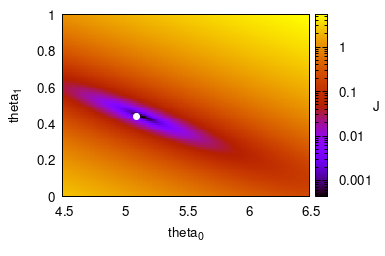

In [4]:
%%gnuplot
reset
set xr[4.5:6.5]
set yr[0:1]
set log cb
set xlabel "theta_0"
set ylabel "theta_1"
set cblabel "J" rotate by 0 offset -1
p "tmp.txt" w image notitle,\
    "<echo 5.1, 0.44" w p lc rgb "white" pt 7 notitle

## Analytical solution for $\dim=2$

To find optimal solution for $\theta$ one could solve the gradient equation (one should check the second derivatives as well, but we skip this part in the following derivaiton)

$$ \frac{\partial J(\theta)}{\partial \theta} = 0 .$$

This lead to the following equations:

$$
\begin{cases}
\frac{\partial J(\theta)}{\partial \theta_0} = 0,\\[1ex]
\frac{\partial J(\theta)}{\partial \theta_1} = 0.
\end{cases}
$$

$$
\frac{\partial J}{\partial \theta_j} = \tfrac 1{2m}\sum_i 2 [h_\theta(x_i) - y_i] \frac{h_\theta(x_i)}{\partial \theta_j}
$$

$$
\begin{cases}
\tfrac{\partial J}{\partial \theta_0} = \tfrac 1{m}\sum_i [h_\theta(x_i) - y_i] = 0,\\[1ex]
\tfrac{\partial J}{\partial \theta_1} = \tfrac 1{m}\sum_i [h_\theta(x_i) - y_i]x_i = 0
\end{cases}
$$

From the first equation:

$$
\frac1m\sum_i [\theta_0 + \theta_1 x_i - y_i] = 0
$$

$$
\theta_0 + \theta_1 \overline x - \overline y  = 0
$$

$$
\boxed{\theta_0 =  \overline y - \theta_1 \overline x }
$$

From the second equation:

$$
\frac1m\sum_i [\theta_0 + \theta_1 x_i - y_i] x_i= 0
$$

$$
\frac1m\sum_i [\theta_0 x_i + \theta_1 x_i^2 - x_iy_i]= 0
$$

$$
\theta_0\overline x + \theta_1 \overline {x^2} - \overline {xy}  = 0
$$

$$
\overline x\, \overline y - \theta_1 \overline x^2 + \theta_1 \overline {x^2} - \overline {xy}  = 0
$$

$$
\boxed{\theta_1 = \frac{\overline{xy}-\overline x\,\overline y}{\overline{x^2} -\overline x^2}}
$$

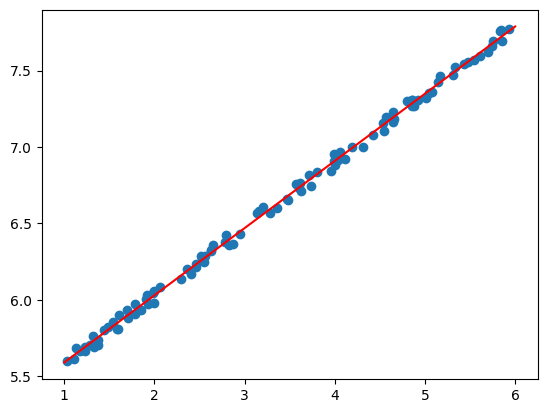

In [5]:
Ex = np.average(x)
Ey = np.average(y)
Exy = np.average(x * y)
Ex2 = np.average(x * x)

theta1 = (Exy - Ex * Ey) / (Ex2 - Ex * Ex)
theta0 = Ey - theta1 * Ex

fig, ax = plt.subplots()
ax.scatter(x, y)
linx = np.linspace(1, 6, 100)
liny = theta0 + theta1 * linx
ax.plot(linx, liny, '-r', label='y=2x+1')

plt.show()